In [84]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('../Datasets/NYCTaxiFares.csv')

In [86]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [87]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [88]:
df.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14 UTC,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


In [89]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2] - df[lat1])
    delta_lamda = np.radians(df[long2] - df[long1])

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lamda / 2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = r * c

    return d

In [90]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [92]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [93]:
my_time = df['pickup_datetime'][0]

In [94]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [95]:
df['Hour'] = df['EDTdate'].dt.hour

In [96]:
df['AmorPM'] = np.where(df['Hour'] > 12, 0, 1)

In [97]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [98]:
cat_cols = ['Hour', 'AmorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']

In [99]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AmorPM', 'Weekday'],
      dtype='object')

In [100]:
for c in cat_cols:
    df[c] = df[c].astype('category')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   EDTdate            120000 non-null  datetime64[ns, UTC]
 10  Hour               120000 non-null  category           
 11  AmorPM             120000 non-null  category           
 12  Weekday            120000 non-

In [102]:
hr = df['Hour'].cat.codes.values
ampm = df['AmorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  1,  1],
       [11,  1,  2],
       [ 7,  1,  2],
       [17,  0,  3],
       [22,  0,  0]], dtype=int8)

In [103]:
cats = torch.tensor(cats, dtype=torch.int64)

cats[:5]

tensor([[ 4,  1,  1],
        [11,  1,  2],
        [ 7,  1,  2],
        [17,  0,  3],
        [22,  0,  0]])

In [104]:
conts = np.stack([df[cont].values for cont in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float32)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [105]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

y[:5]

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        [ 8.9000],
        [19.7000]])

In [106]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
print(cat_szs)
emb_szs = [(size, min((size + 1) // 2, 50)) for size in cat_szs]
print(emb_szs)

[24, 2, 7]
[(24, 12), (2, 1), (7, 4)]


In [110]:
class TabularModel(nn.Module):

    def __init__(self, emb_size, n_cnt, out_size, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_size])
        self.emb_drop = nn.Dropout(p)
        self.bn_count = nn.BatchNorm1d(n_cnt)

        layerlist = []
        n_embs = sum([nf for ni, nf in emb_size])
        n_in = n_embs + n_cnt

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_size))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []

        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_count(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x


In [111]:
torch.manual_seed(32)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=.4)

In [112]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_count): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [113]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [114]:
batch_size = 6000
test_size = int(batch_size * .2)

In [116]:
cat_train = cats[:batch_size - test_size] 
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

In [117]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [118]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1

    y_pred = model(cat_train, con_train)

    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss is 12.41072940826416
epoch: 11 loss is 9.619124412536621
epoch: 21 loss is 7.904165744781494
epoch: 31 loss is 4.839576721191406
epoch: 41 loss is 3.9068238735198975
epoch: 51 loss is 3.2929115295410156
epoch: 61 loss is 3.3053550720214844
epoch: 71 loss is 3.1658573150634766
epoch: 81 loss is 3.103714942932129
epoch: 91 loss is 3.0322318077087402
epoch: 101 loss is 3.0948104858398438
epoch: 111 loss is 3.038160562515259
epoch: 121 loss is 3.0187058448791504
epoch: 131 loss is 2.940948486328125
epoch: 141 loss is 2.9832763671875
epoch: 151 loss is 2.9624626636505127
epoch: 161 loss is 2.941009998321533
epoch: 171 loss is 2.9178245067596436
epoch: 181 loss is 2.9398131370544434
epoch: 191 loss is 2.9115657806396484
epoch: 201 loss is 2.859262704849243
epoch: 211 loss is 2.878692626953125
epoch: 221 loss is 2.847991466522217
epoch: 231 loss is 2.8674330711364746
epoch: 241 loss is 2.875145196914673
epoch: 251 loss is 2.822068929672241
epoch: 261 loss is 2.765460968017578
ep

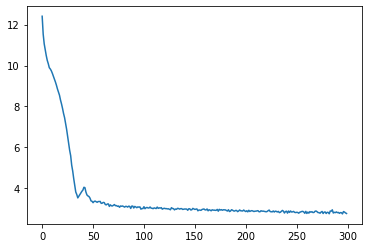

In [119]:
plt.plot(range(epochs), losses)

In [120]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [121]:
loss

tensor(3.9743)

In [128]:
for i in range(10):
    print(f'{i} PREDICTED {y_val[i].item():8.4f} TRUE: {y_test[i].item():8.4f}')

0 PREDICTED   8.0652 TRUE:   9.3000
1 PREDICTED   3.9038 TRUE:   4.1000
2 PREDICTED  10.9123 TRUE:  10.1000
3 PREDICTED   7.0264 TRUE:   6.5000
4 PREDICTED   5.8559 TRUE:   6.9000
5 PREDICTED   6.6528 TRUE:   4.9000
6 PREDICTED  11.2840 TRUE:  11.7000
7 PREDICTED   3.7246 TRUE:   4.5000
8 PREDICTED   3.9838 TRUE:   3.3000
9 PREDICTED   5.5499 TRUE:   5.3000


In [129]:
torch.save(model.state_dict(), 'TaxiModel.pt')